In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [11]:
X = pd.read_csv('CC_GENERAL.csv')
# Dropping the CUST_ID column from the data
X = X.drop('CUST_ID', axis = 1)
# Handling the missing values
X.fillna(method ='ffill', inplace = True)

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Normalizing the data so that the data approximately
# follows a Gaussian distribution
X_normalized = normalize(X_scaled)
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)


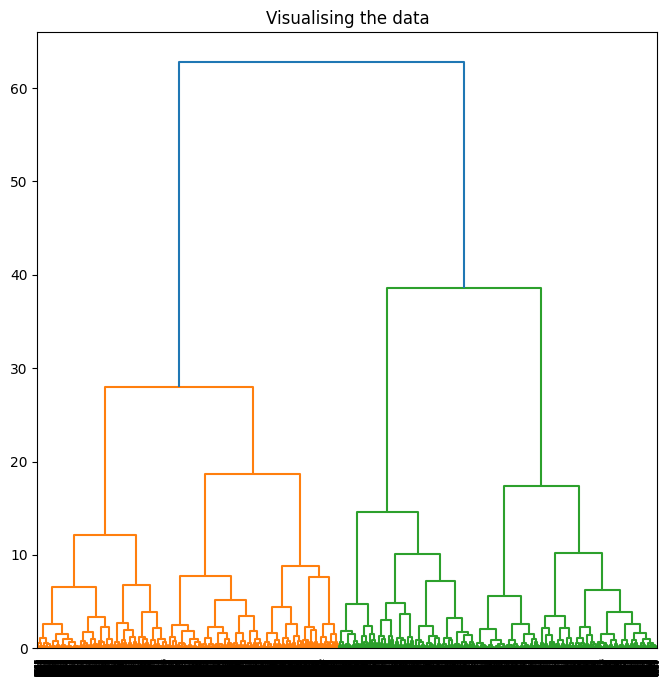

In [14]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

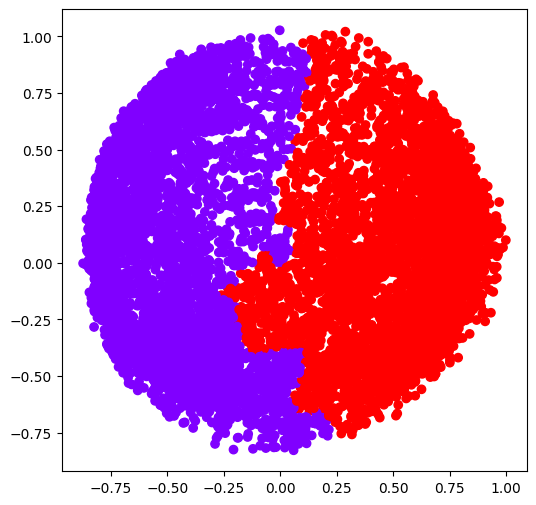

In [15]:
ac2 = AgglomerativeClustering(n_clusters = 2)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
 c = ac2.fit_predict(X_principal), cmap ='rainbow')
plt.show()

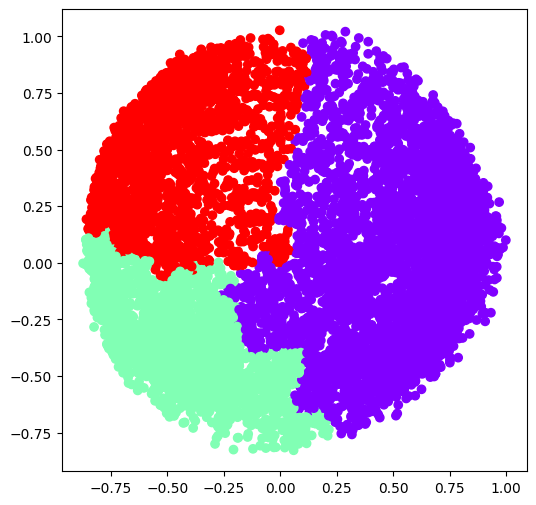

In [16]:
ac3 = AgglomerativeClustering(n_clusters = 3)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
 c = ac3.fit_predict(X_principal), cmap ='rainbow')
plt.show()